# Basics of Pytorch

This notebook will showcase some of the basic tensor operations on PyTorch

In [2]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [3]:
# Basic autograd example

# Create tensors.
x = torch.tensor(1, requires_grad=True)
w = torch.tensor(2, requires_grad=True)
b = torch.tensor(3, requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2)
tensor(1)
tensor(1)


In [4]:
# Basic Linear layer
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [7]:
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.2865, -0.2071, -0.2239],
        [-0.4665,  0.1502,  0.2819]])
b:  Parameter containing:
tensor([-0.2200,  0.2900])


In [10]:
# linear.parameters will return over an iterable
for i in linear.parameters():
    print(i)

Parameter containing:
tensor([[-0.2865, -0.2071, -0.2239],
        [-0.4665,  0.1502,  0.2819]])
Parameter containing:
tensor([-0.2200,  0.2900])


In [11]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [12]:
# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.9307407140731812


In [14]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.1721, -0.1084, -0.5698],
        [-0.4160,  0.2623,  0.7568]])
dL/db:  tensor([ 0.0588,  0.5265])


In [15]:
# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  0.9162279963493347


Linear Regresssion using PyTorch

Epoch [5/60], Loss: 1.2813
Epoch [10/60], Loss: 0.6993
Epoch [15/60], Loss: 0.4633
Epoch [20/60], Loss: 0.3675
Epoch [25/60], Loss: 0.3285
Epoch [30/60], Loss: 0.3125
Epoch [35/60], Loss: 0.3058
Epoch [40/60], Loss: 0.3029
Epoch [45/60], Loss: 0.3015
Epoch [50/60], Loss: 0.3007
Epoch [55/60], Loss: 0.3002
Epoch [60/60], Loss: 0.2998


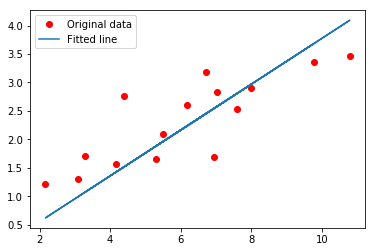

In [17]:
# Linear regression
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [19]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='data/', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data/', 
                                          train=False, 
                                          transform=transforms.ToTensor())

Processing...
Done!


In [23]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [25]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [26]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2556
Epoch [1/5], Step [200/600], Loss: 2.1113
Epoch [1/5], Step [300/600], Loss: 2.0161
Epoch [1/5], Step [400/600], Loss: 1.9339
Epoch [1/5], Step [500/600], Loss: 1.8534
Epoch [1/5], Step [600/600], Loss: 1.7958
Epoch [2/5], Step [100/600], Loss: 1.7263
Epoch [2/5], Step [200/600], Loss: 1.6041
Epoch [2/5], Step [300/600], Loss: 1.6084
Epoch [2/5], Step [400/600], Loss: 1.5396
Epoch [2/5], Step [500/600], Loss: 1.5151
Epoch [2/5], Step [600/600], Loss: 1.4503
Epoch [3/5], Step [100/600], Loss: 1.4569
Epoch [3/5], Step [200/600], Loss: 1.3823
Epoch [3/5], Step [300/600], Loss: 1.2968
Epoch [3/5], Step [400/600], Loss: 1.3101
Epoch [3/5], Step [500/600], Loss: 1.2667
Epoch [3/5], Step [600/600], Loss: 1.1827
Epoch [4/5], Step [100/600], Loss: 1.2561
Epoch [4/5], Step [200/600], Loss: 1.1627
Epoch [4/5], Step [300/600], Loss: 1.1892
Epoch [4/5], Step [400/600], Loss: 1.1444
Epoch [4/5], Step [500/600], Loss: 1.1191
Epoch [4/5], Step [600/600], Loss:

In [27]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 83 %
